# Fetching dataset

In [1]:
import keras
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report

In [2]:
%matplotlib inline

In [3]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [4]:
y_train_catagorical = keras.utils.to_categorical(y_train, 10)
y_test_catagorical = keras.utils.to_categorical(y_test, 10)

In [5]:
X_train_expanded =  np.expand_dims(X_train, axis=-1)
X_test_expanded =  np.expand_dims(X_test, axis=-1)

In [6]:
X_train_classifier, X_val_classifier, y_train_classifier, y_val_classifier = train_test_split(X_train_expanded, y_train_catagorical, test_size = 0.1, random_state = 1)

In [7]:
X_test_classifier = X_test_expanded
y_test_classifier = y_test_catagorical

## Vizualizing the Dataset

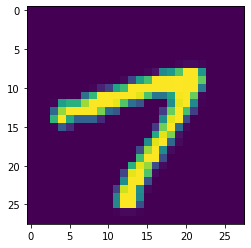

In [8]:
plt.imshow(X_train[101])

In [9]:
y_train[101]

7

# Classifier

In [10]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout

In [11]:
classifier = Sequential()

classifier.add(Conv2D(32, (3, 3), input_shape = (28, 28, 1), activation = 'relu', kernel_initializer='random_normal'))
classifier.add(Conv2D(32, (3, 3), activation = 'relu', kernel_initializer = 'random_normal'))
classifier.add(MaxPooling2D(pool_size = (2,2)))
classifier.add(Dropout(0.6))

classifier.add(Conv2D(64, (3,3), activation = 'relu', kernel_initializer = 'random_normal'))
classifier.add(Conv2D(64, (3,3), activation = 'relu', kernel_initializer = 'random_normal'))
classifier.add(MaxPooling2D(pool_size = (2,2)))
classifier.add(Dropout(0.6))

classifier.add(Flatten())

classifier.add(Dense(units = 128, activation = 'relu', kernel_initializer='random_normal'))
classifier.add(Dropout(0.6))

classifier.add(Dense(units = 10, activation = 'softmax', kernel_initializer='random_normal'))



In [12]:
opt = keras.optimizers.Adam(
    learning_rate=0.001
)

In [13]:
classifier.compile(loss = 'categorical_crossentropy', optimizer = opt, metrics=['accuracy'])

Model

In [14]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 10, 10, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 64)          36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 4, 4, 64)          0

Training Model

In [15]:
callbacks = [
    keras.callbacks.ModelCheckpoint('classifier.h5', save_best_only=True),
    keras.callbacks.ReduceLROnPlateau()]

In [ ]:
history = classifier.fit(X_train_classifier, y_train_classifier, batch_size=32, epochs=100, verbose=1, validation_data = (X_val_classifier, y_val_classifier), callbacks = callbacks)

Epoch 1/100


Testing the Dataset

In [ ]:
model = keras.models.load_model("classifier.h5")

In [ ]:
y_true = np.argmax(y_test_classifier,axis=1)
y_p = model.predict(X_test_classifier)
y_predicted = np.argmax(y_p,axis=1)
print('confusion matrix')
print(confusion_matrix(y_true,y_predicted))

In [ ]:
print('Classification report')
print(classification_report(y_true,y_predicted))

Training Evaluation

In [ ]:
# summarize history for accuracy
plt.plot(history.history['accuracy'][0:100])
plt.plot(history.history['val_accuracy'][0:100])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training_accuracy', 'validation_accuracy'], loc='lower right')
plt.show()

In [ ]:
# summarize history for loss
plt.plot(history.history['loss'][0:100])
plt.plot(history.history['val_loss'][0:100])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training_accuracy', 'validation_accuracy'], loc='upper right')
plt.show()